# QF 627 Programming and Computational Finance
## Lesson 04 | Trading Strategies `Part 2`

> Hi, Team 👋 Thank you for opening the script 🙂

## DEPENDENCIES

In [1]:
# Load libraries.

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib as mpl

import seaborn as sns

import time

import datetime # as dt

import datetime as dt

import warnings
warnings.filterwarnings("ignore")

# Set print options.

np.set_printoptions(precision = 3)

plt.style.use("ggplot") # Grammar of Graphics Theme

mpl.rcParams["axes.grid"] = True
mpl.rcParams["grid.color"] = "grey"
mpl.rcParams["grid.alpha"] = 0.25

mpl.rcParams["axes.facecolor"] = "white"

mpl.rcParams["legend.fontsize"] = 14

%matplotlib inline

In [2]:
import pandas_datareader.data as web # this will potentially lead to an error.

from pandas_datareader import data as pdr

import yfinance as yf

(
    yf
    .pdr_override()
)

# pdr
# .get_data_yahoo()

## 👉 <a id = "top">Learning Pointers</a> 👈 

## [1. Forex Trading with Simple Moving Averages](#p1)

> ### <font color = red> USE vectorization </font>

## [2. Time-Series Momentum Strategy](#p2)

> ### <font color = red> AND intraday stock trading </font>

## [3. Mean Reversion Strategy](#p3)

> ### <font color = red> Regression towards the Mean </font>

## [4. Some Revision Pointers](#p4)

> ### <font color = red> For Your Learning </font>

## [5. What We Learned](#p5)

> ### <font color = red> Thus far... </font>

In [3]:
%whos

Variable   Type      Data/Info
------------------------------
datetime   module    <module 'datetime' from '<...>onda3\\Lib\\datetime.py'>
dt         module    <module 'datetime' from '<...>onda3\\Lib\\datetime.py'>
mpl        module    <module 'matplotlib' from<...>matplotlib\\__init__.py'>
np         module    <module 'numpy' from 'E:\<...>ges\\numpy\\__init__.py'>
pd         module    <module 'pandas' from 'E:<...>es\\pandas\\__init__.py'>
pdr        module    <module 'pandas_datareade<...>das_datareader\\data.py'>
plt        module    <module 'matplotlib.pyplo<...>\\matplotlib\\pyplot.py'>
sns        module    <module 'seaborn' from 'E<...>s\\seaborn\\__init__.py'>
time       module    <module 'time' (built-in)>
warnings   module    <module 'warnings' from '<...>onda3\\Lib\\warnings.py'>
web        module    <module 'pandas_datareade<...>das_datareader\\data.py'>
yf         module    <module 'yfinance' from '<...>\\yfinance\\__init__.py'>


## <a id = "p1">1. </a> <font color = "green"> Rolling Statistics Revisited </font>  [back to table of contents](#top)

### Analytics Contexts


> As a continuation of Thursday's lesson on algorithmic trading strategies, we will have a quick `refresher` on simple moving averages (`SMA`) strategy. Then, we will learn about `time-series momentum strategy`, which focuses on a stock’s recent performance. Then, we will look at `mean-reversion strategies` (which uses the opposite reasoning of momentum strategies).

<a id="sma"></a>
### Let’s obtain a historical exchange rate between USD and EUROs

> A list of all the exchange rates that FRED (Federal Reserve Bank of St. Louis) has daily data for can be found [HERE](http://research.stlouisfed.org/fred2/categories/94).

In [4]:
fx =\
(    pdr
    .get_data_fred("DEXUSEU",
                   start = dt.datetime(2012, 9, 9),
                   end = dt.datetime(2023, 9, 8)
                  )
    .dropna()
)

In [5]:
fx

,DEXUSEU
DATE,
2012-09-10,1.2795
2012-09-11,1.2858
2012-09-12,1.2894
2012-09-13,1.2912
2012-09-14,1.3142
...,...
2023-09-01,1.0787
2023-09-05,1.0727
2023-09-06,1.0714


In [6]:
fx =\
(
    fx
    .rename(columns = {"DEXUSEU": "Price"}
           )
)

fx.head(2)

,Price
DATE,
2012-09-10,1.2795
2012-09-11,1.2858


In [7]:
# short-term simple moving averages = 40 days
# long-term simple moving averages = 250 days

# SSMA

fx["SMA_40"] =\
(
    fx
    ["Price"]
    .rolling(window = 40)
    .mean()
)

# LSMA

fx["SMA_250"] =\
(
    fx
    ["Price"]
    .rolling(250)
    .mean()
)

In [8]:
fx.iloc[:40]

,Price,SMA_40,SMA_250
DATE,,,
2012-09-10,1.2795,NaN,NaN
2012-09-11,1.2858,NaN,NaN
2012-09-12,1.2894,NaN,NaN
2012-09-13,1.2912,NaN,NaN
2012-09-14,1.3142,NaN,NaN
2012-09-17,1.3125,NaN,NaN
2012-09-18,1.3051,NaN,NaN
2012-09-19,1.3065,NaN,NaN
2012-09-20,1.2948,NaN,NaN


<Axes: title={'center': 'USD/EUR SMAs (40 vs. 250 days)'}, xlabel='DATE'>

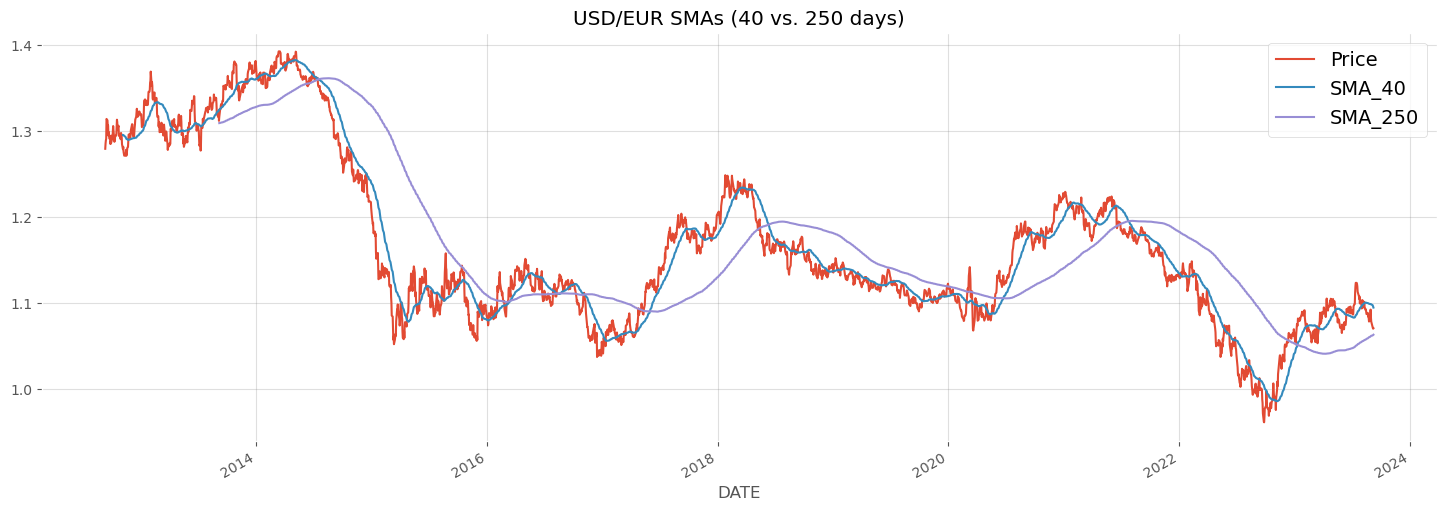

In [9]:
(
    fx
    .plot(title = "USD/EUR SMAs (40 vs. 250 days)",
          figsize = [18, 6]
         )
)

In [10]:
fx["positions"] =\
(
    np
    .where(fx["SMA_40"] > fx["SMA_250"],
           1, -1)
    # golden, dead
)

fx

,Price,SMA_40,SMA_250,positions
DATE,,,,
2012-09-10,1.2795,NaN,NaN,-1
2012-09-11,1.2858,NaN,NaN,-1
2012-09-12,1.2894,NaN,NaN,-1
2012-09-13,1.2912,NaN,NaN,-1
2012-09-14,1.3142,NaN,NaN,-1
...,...,...,...,...
2023-09-01,1.0787,1.098577,1.062194,1
2023-09-05,1.0727,1.097917,1.062473,1
2023-09-06,1.0714,1.097222,1.062793,1


In [11]:
fx =\
(
    fx
    .dropna()
)

fx

,Price,SMA_40,SMA_250,positions
DATE,,,,
2013-09-06,1.3166,1.325128,1.309353,1
2013-09-09,1.3260,1.325657,1.309539,1
2013-09-10,1.3260,1.326210,1.309700,1
2013-09-11,1.3301,1.326603,1.309862,1
2013-09-12,1.3315,1.327155,1.310024,1
...,...,...,...,...
2023-09-01,1.0787,1.098577,1.062194,1
2023-09-05,1.0727,1.097917,1.062473,1
2023-09-06,1.0714,1.097222,1.062793,1


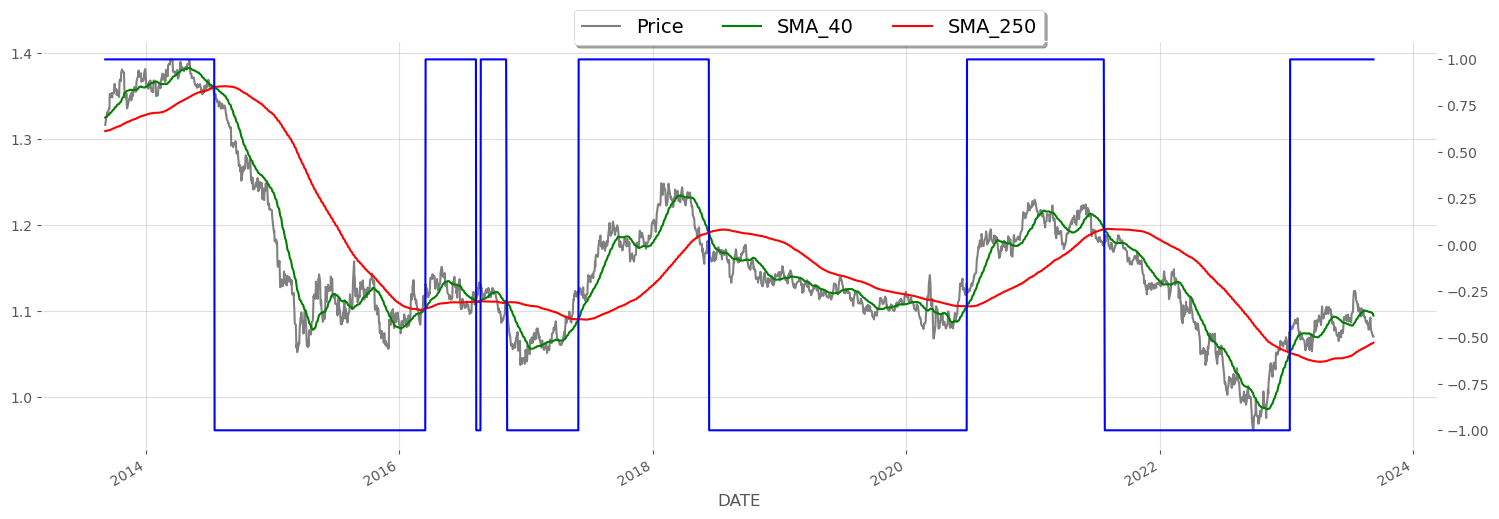

In [12]:
ax =\
(
    fx
    [["Price", 
      "SMA_40", 
      "SMA_250", 
      "positions"]]
    .plot(secondary_y = "positions",
          style = ["grey", 
                   "green",
                   "red",
                   "blue"],
          figsize = [18, 6]
         )
)

(
    ax
    .legend(loc = "upper center",
            shadow = True,
            ncol = 4,
            bbox_to_anchor = (0.55, 1.10),
            fancybox = True)
)

> To calculate the performance of the strategy, calculate the log returns based on the original financial time series. The code for this can be minimal, thanks to vectorization.

> Let’s calculate the log returns in vectorized fashion over the price column.

> To derive the strategy returns, multiply the position column—shifted by one trading day—with the returns column. Because log returns are additive, calculating the sum over the columns returns and strategy provides a first comparison of the performance of the strategy relative to the base investment itself.

In [13]:
fx["log_returns"] =\
(
    np
    .log(fx["Price"] / fx["Price"].shift(1)
        )
)

fx

,Price,SMA_40,SMA_250,positions,log_returns
DATE,,,,,
2013-09-06,1.3166,1.325128,1.309353,1,NaN
2013-09-09,1.3260,1.325657,1.309539,1,0.007114
2013-09-10,1.3260,1.326210,1.309700,1,0.000000
2013-09-11,1.3301,1.326603,1.309862,1,0.003087
2013-09-12,1.3315,1.327155,1.310024,1,0.001052
...,...,...,...,...,...
2023-09-01,1.0787,1.098577,1.062194,1,-0.004809
2023-09-05,1.0727,1.097917,1.062473,1,-0.005578
2023-09-06,1.0714,1.097222,1.062793,1,-0.001213


> `Log returns` (a. k. a. continuously compounded returns) are commonly used in quant. finance for several reasons:

* `Statistical Properties`: Log returns are approximately normally distributed for many assets, especially when considered over short intervals. This normality simplifies various statistical analyses and hypothesis testing.
<br>

* `Time Additivity`: Log returns are additive across time. For instance, if you have daily log returns, you can easily compute weekly, monthly, or yearly log returns by simply summing the daily log returns over those periods. This is not the case with simple (arithmetic) returns, which need to be compounded.
<br>

* `Small Values for Small Changes`: For assets that don't exhibit large price changes over short time horizons, log returns will remain small, making them easier to work with analytically.
<br>

* `Numerical Stability`: Log returns can provide more numerical stability in certain mathematical and computational operations. For instance, when prices of an asset are multiplied by factors (like in stock splits or dividend payments), log returns remain unaffected, whereas simple returns would change.
<br>

* `Economic Interpretations`: In certain economic and financial theories, continuously compounded returns (log returns) have more straightforward interpretations. For example, the Black-Scholes model for option pricing assumes that stock prices follow a geometric Brownian motion, which inherently deals with log returns.
<br>

* `Symmetry`: Log returns are symmetric. This means that a 10% increase in price followed by a 10% decrease in price will result in a net zero log return, but not a net zero arithmetic return.

<Axes: >

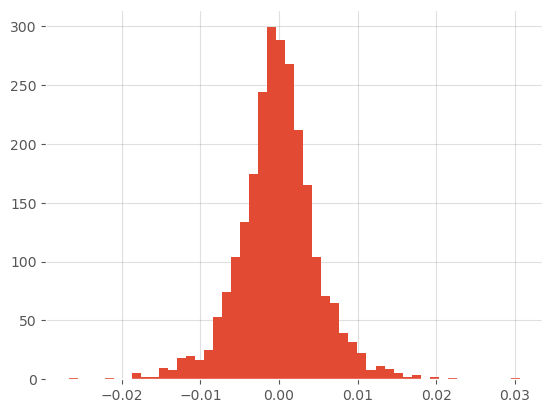

In [14]:
(fx["log_returns"]
    .hist(bins = 50)
)

In [15]:
fx

,Price,SMA_40,SMA_250,positions,log_returns
DATE,,,,,
2013-09-06,1.3166,1.325128,1.309353,1,NaN
2013-09-09,1.3260,1.325657,1.309539,1,0.007114
2013-09-10,1.3260,1.326210,1.309700,1,0.000000
2013-09-11,1.3301,1.326603,1.309862,1,0.003087
2013-09-12,1.3315,1.327155,1.310024,1,0.001052
...,...,...,...,...,...
2023-09-01,1.0787,1.098577,1.062194,1,-0.004809
2023-09-05,1.0727,1.097917,1.062473,1,-0.005578
2023-09-06,1.0714,1.097222,1.062793,1,-0.001213


#### Derives the log returns of the strategy given the positionings and market returns.

In [16]:
fx["strategy_returns"] =\
(
    fx["positions"]
    .shift(1) 
    * 
    fx["log_returns"]
)

fx["strategy_returns"]

DATE
2013-09-06         NaN
2013-09-09    0.007114
2013-09-10    0.000000
2013-09-11    0.003087
2013-09-12    0.001052
                ...   
2023-09-01   -0.004809
2023-09-05   -0.005578
2023-09-06   -0.001213
2023-09-07   -0.000934
2023-09-08    0.000467
Name: strategy_returns, Length: 2500, dtype: float64

In [17]:
fx[["log_returns", "strategy_returns"]]

,log_returns,strategy_returns
DATE,,
2013-09-06,NaN,NaN
2013-09-09,0.007114,0.007114
2013-09-10,0.000000,0.000000
2013-09-11,0.003087,0.003087
2013-09-12,0.001052,0.001052
...,...,...
2023-09-01,-0.004809,-0.004809
2023-09-05,-0.005578,-0.005578
2023-09-06,-0.001213,-0.001213


#### Sums up the single log return values for both the stock and the strategy (for learning purposes).

In [18]:
(
    fx
    [["log_returns", "strategy_returns"]]
    .sum()
)

log_returns        -0.206553
strategy_returns    0.372737
dtype: float64

In [19]:
# for reporting to lay-person and/or to your stakeholders

In [20]:
(
    fx
    [["log_returns", "strategy_returns"]]
    .sum()
).apply(np.exp)

log_returns         0.813383
strategy_returns    1.451703
dtype: float64

<Axes: xlabel='DATE'>

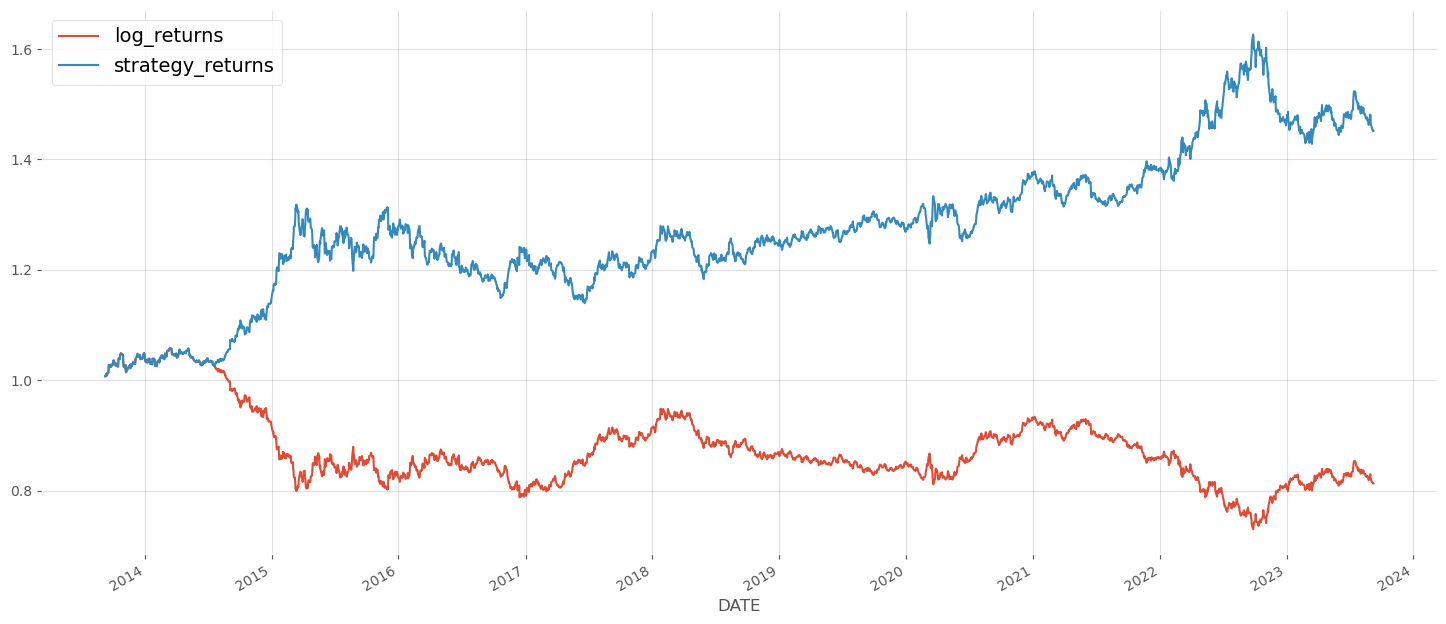

In [21]:
(
    fx
    [["log_returns", "strategy_returns"]]
    .cumsum()
    .apply(np.exp)
).plot(figsize = [18, 8]
      )

In [22]:
# Let's calculate performance metrics

(
    fx[["log_returns", "strategy_returns"]]
    .mean()
    *
    252
)

log_returns        -0.020829
strategy_returns    0.037587
dtype: float64

In [23]:
# Bring it back to original scale

np.exp(
    fx[["log_returns", "strategy_returns"]]
    .mean()
    *
    252
) - 1

log_returns        -0.020613
strategy_returns    0.038302
dtype: float64

In [24]:
(
    fx
    [["log_returns", "strategy_returns"]]
    .std()
    * 252
    ** 0.5
)

log_returns         0.078705
strategy_returns    0.078680
dtype: float64

In [25]:
(
    (fx[["log_returns", "strategy_returns"]].apply(np.exp) - 1)
    .std()
    * 252
    ** 0.5
)

log_returns         0.078705
strategy_returns    0.078669
dtype: float64

In [26]:
fx["cumulative_returns"] =\
(
    fx["strategy_returns"]
    .cumsum()
    .apply(np.exp)
)

fx

,Price,SMA_40,SMA_250,positions,log_returns,strategy_returns,cumulative_returns
DATE,,,,,,,
2013-09-06,1.3166,1.325128,1.309353,1,NaN,NaN,NaN
2013-09-09,1.3260,1.325657,1.309539,1,0.007114,0.007114,1.007140
2013-09-10,1.3260,1.326210,1.309700,1,0.000000,0.000000,1.007140
2013-09-11,1.3301,1.326603,1.309862,1,0.003087,0.003087,1.010254
2013-09-12,1.3315,1.327155,1.310024,1,0.001052,0.001052,1.011317
...,...,...,...,...,...,...,...
2023-09-01,1.0787,1.098577,1.062194,1,-0.004809,-0.004809,1.462276
2023-09-05,1.0727,1.097917,1.062473,1,-0.005578,-0.005578,1.454143
2023-09-06,1.0714,1.097222,1.062793,1,-0.001213,-0.001213,1.452380


In [27]:
fx["max_gross_performance"] =\
(
    fx
    ["cumulative_returns"]
    .cummax()
)

In [28]:
fx.head()

,Price,SMA_40,SMA_250,positions,log_returns,strategy_returns,cumulative_returns,max_gross_performance
DATE,,,,,,,,
2013-09-06,1.3166,1.325128,1.309353,1,NaN,NaN,NaN,NaN
2013-09-09,1.3260,1.325657,1.309539,1,0.007114,0.007114,1.007140,1.007140
2013-09-10,1.3260,1.326210,1.309700,1,0.000000,0.000000,1.007140,1.007140
2013-09-11,1.3301,1.326603,1.309862,1,0.003087,0.003087,1.010254,1.010254
2013-09-12,1.3315,1.327155,1.310024,1,0.001052,0.001052,1.011317,1.011317


<Axes: xlabel='DATE'>

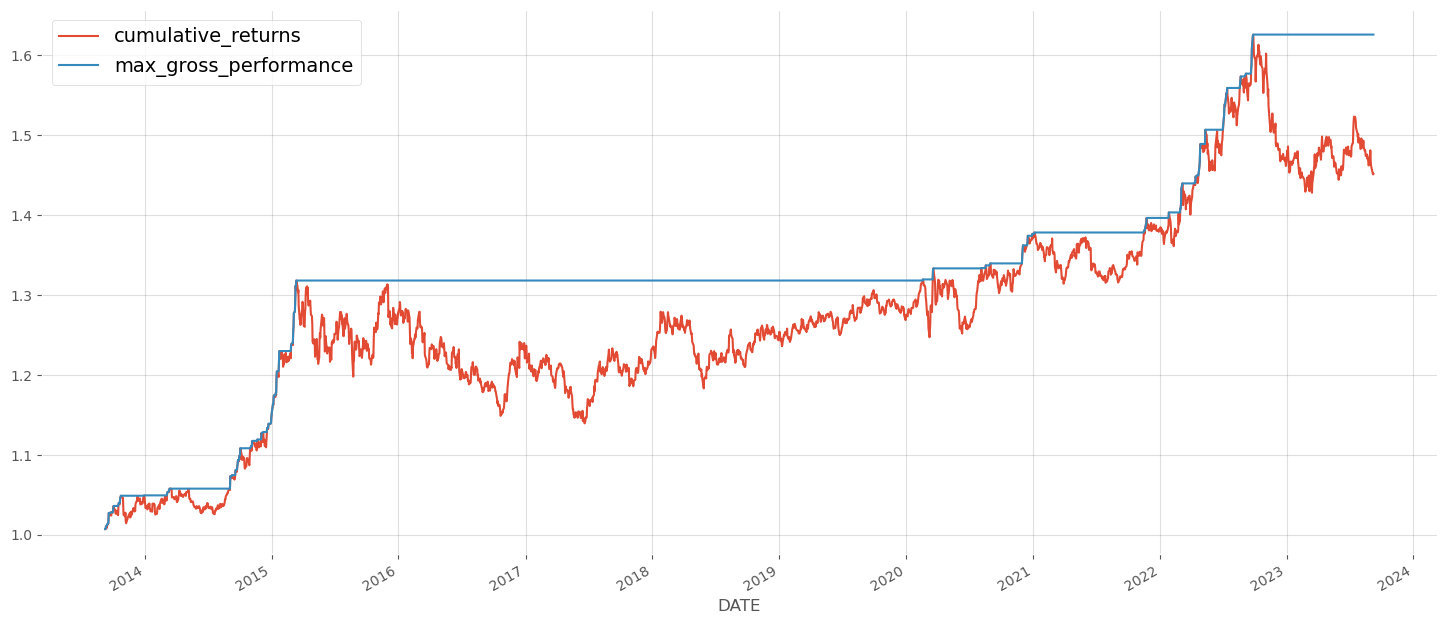

In [29]:
(
    fx
    [["cumulative_returns", "max_gross_performance"]]
    .dropna()
    .plot(figsize = [18, 8]
         )
)

> Recall the previous lesson: the maximum drawdown is then simply calculated as the maximum of the difference between the two relevant columns.

In [30]:
drawdown = fx["max_gross_performance"] - fx["cumulative_returns"]

drawdown

DATE
2013-09-06         NaN
2013-09-09    0.000000
2013-09-10    0.000000
2013-09-11    0.000000
2013-09-12    0.000000
                ...   
2023-09-01    0.163807
2023-09-05    0.171941
2023-09-06    0.173703
2023-09-07    0.175059
2023-09-08    0.174381
Length: 2500, dtype: float64

In [31]:
drawdown.max()

0.19796820405187265

> In this case, the maximum drawdown is about __`19.8`__ percentage points.

> The longest drawdown period can be calculated using those dates at which the gross performance equals its cumulative maximum (namely, where a new maximum is set). Then the differences in days between all such dates are calculated, and the longest period comes out.

In [32]:
drawdown[drawdown == 0]

DATE
2013-09-09    0.0
2013-09-10    0.0
2013-09-11    0.0
2013-09-12    0.0
2013-09-16    0.0
             ... 
2022-09-21    0.0
2022-09-22    0.0
2022-09-23    0.0
2022-09-26    0.0
2022-09-27    0.0
Length: 112, dtype: float64

In [33]:
drawdown[drawdown == 0].index[1:]

DatetimeIndex(['2013-09-10', '2013-09-11', '2013-09-12', '2013-09-16',
               '2013-09-17', '2013-09-19', '2013-09-25', '2013-09-27',
               '2013-10-02', '2013-10-03',
               ...
               '2022-07-11', '2022-07-12', '2022-07-14', '2022-08-22',
               '2022-09-06', '2022-09-21', '2022-09-22', '2022-09-23',
               '2022-09-26', '2022-09-27'],
              dtype='datetime64[ns]', name='DATE', length=111, freq=None)

In [34]:
periods =\
(
    drawdown[drawdown == 0].index[ 1 :   ].to_pydatetime()
    -
    drawdown[drawdown == 0].index[   : -1].to_pydatetime()
)

In [35]:
periods.max()

datetime.timedelta(days=1804)

> The longest drawdown period lasts for __`1,804`__ days.

## <a id = "p2">2.</a>  <font color = "green"> Time-Series Momentum Strategy </font>  [back to table of contents](#top)

> Cross-sectional momentum strategies, using a larger pool of instruments, buy those instruments that have recently performed better than their peers (and/or a benchmark) and sell those instruments that have underperformed. The strategies rely on the notion that instruments would continue to outperform and underperform, respectively—at least for a certain period of time.

    Time-series momentum strategies buy those instruments that have recently performed well and sell those instruments that have recently performed poorly. Here, the benchmark is the past returns of the instrument itself.

> The most simple time series momentum strategy is to buy the stock if the last return was positive and to sell it if it was negative. With NumPy and pandas, this is easy to formalize; just take the sign of the last available return as the market position.

In [36]:
# DJIA, S&P 500, Nasdaq

tickers = ["DIA", "SPY", "QQQ"]

In [37]:
def obtain(tickers,
           start,
           end):
    def data(ticker):
        return(pdr
               .get_data_yahoo(ticker,
                               start = start,
                               end = end)
              )
    interim_data = map(data, tickers)
    return(pd
          .concat(interim_data,
                  keys = tickers,
                  names = ["Tickers", "Date"]
                 )
          )

In [38]:
data =\
(
    obtain(tickers,
            dt.datetime(2013, 9, 9),
            dt.datetime(2023, 9, 8)
           )
)

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


In [39]:
data

Open        High         Low       Close  \
Tickers Date                                                         
DIA     2013-09-09  149.500000  150.779999  149.479996  150.470001   
        2013-09-10  151.470001  151.820007  151.100006  151.789993   
        2013-09-11  151.820007  153.179993  151.770004  153.149994   
        2013-09-12  153.330002  153.410004  152.779999  153.029999   
        2013-09-13  153.339996  153.800003  153.210007  153.690002   
...                        ...         ...         ...         ...   
QQQ     2023-08-31  376.940002  379.720001  376.869995  377.989990   
        2023-09-01  380.399994  380.829987  376.079987  377.589996   
        2023-09-05  376.769989  379.309998  375.829987  378.070007   
        2023-09-06  377.279999  377.630005  372.700012  374.739990   
        2023-09-07  370.209991  372.850006  369.149994  372.059998   

                     Adj Close    Volume  
Tickers Date                              
DIA     2013-09-09  121.401917   4402500  
        2013-09-10  122.466919   7917100  
        2013-09-11  123.564224   7044000  
        2013-09-12  123.467438   5555700  
        2013-09-13  123.999840   4829600  
...                        ...       ...  
QQQ     2023-08-31  377.443604  35730700  
        2023-09-01  377.044189  39772400  
        2023-09-05  377.523529  32344200  
        2023-09-06  374.198303  42998700  
        2023-09-07  371.522186  52060700  

[7551 rows x 6 columns]

In [40]:
data_WIDE =\
(
    data
    ["Close"]
    .reset_index()
    .pivot(index = "Date",
           columns = "Tickers",
           values = "Close")
)

In [41]:
data_WIDE

Tickers,DIA,QQQ,SPY
Date,,,
2013-09-09,150.470001,77.830002,167.630005
2013-09-10,151.789993,78.209999,168.869995
2013-09-11,153.149994,78.059998,169.399994
2013-09-12,153.029999,78.010002,168.949997
2013-09-13,153.690002,78.059998,169.330002
...,...,...,...
2023-08-31,347.809998,377.989990,450.350006
2023-09-01,348.980011,377.589996,451.190002
2023-09-05,346.980011,378.070007,449.239990


In [42]:
qqq =\
(
    pd
    .DataFrame(data_WIDE["QQQ"]
              )
    .rename(columns = {"QQQ": "Price"}
           )
)

In [43]:
qqq

,Price
Date,
2013-09-09,77.830002
2013-09-10,78.209999
2013-09-11,78.059998
2013-09-12,78.010002
2013-09-13,78.059998
...,...
2023-08-31,377.989990
2023-09-01,377.589996
2023-09-05,378.070007


In [44]:
qqq["returns"] =\
(
    np
    .log(qqq["Price"]
         / 
         qqq["Price"].shift(1)
        )
)

In [45]:
qqq.head(2)

,Price,returns
Date,,
2013-09-09,77.830002,NaN
2013-09-10,78.209999,0.004871


In [46]:
sample_array = np.array([1, -4, 3, -6, 2, -7, 8])

In [47]:
sample_array

array([ 1, -4,  3, -6,  2, -7,  8])

In [48]:
np.sign(sample_array)

array([ 1, -1,  1, -1,  1, -1,  1])

In [49]:
qqq

,Price,returns
Date,,
2013-09-09,77.830002,NaN
2013-09-10,78.209999,0.004871
2013-09-11,78.059998,-0.001920
2013-09-12,78.010002,-0.000641
2013-09-13,78.059998,0.000641
...,...,...
2023-08-31,377.989990,0.002994
2023-09-01,377.589996,-0.001059
2023-09-05,378.070007,0.001270


In [50]:
qqq["positions"] =\
(
    np
    .sign(qqq["returns"]
         )
)

qqq[["positions"]]

,positions
Date,
2013-09-09,NaN
2013-09-10,1.0
2013-09-11,-1.0
2013-09-12,-1.0
2013-09-13,1.0
...,...
2023-08-31,1.0
2023-09-01,-1.0
2023-09-05,1.0


In [51]:
qqq["strategy_returns"] =\
(
    qqq["positions"]
    .shift(1)
    *
    qqq["returns"] # passive following
)

In [52]:
(
    qqq
    [["returns", "strategy_returns"]] # passive following vs. your strategy (here, time-series momentum)
    .dropna()dr
    .cumsum()
    .apply(np.exp)
    .plot(figsize = [16, 8]
         )
)

SyntaxError: invalid syntax. Perhaps you forgot a comma? (233512035.py, line 2)

## <a id = "p3">3.</a>  <font color = "green"> Mean Reversion Strategy </font>  [back to table of contents](#top)

> Mean reversion means a tendency of asset prices to return to a trend path. Mean-reversion strategies are based on the opposite belief to momentum strategies—that is, if a financial instrument has performed too well relative to its trend, it is shorted, and vice versa. While time-series momentum strategies expect a positive correlation between returns, mean-reversion strategies anticipate a negative correlation.

    Mean-reversion strategy utilizes a simple moving average (SMA) as a proxy for a trend path. The key is to define a threshold for the distance between the current stock price and the SMA, which serves as a signal for a long or short position.

In [ ]:
gold =\
(
    pdr
    .get_data_yahoo("GDX",
                    start = dt.datetime(2011, 9, 9),
                    end = dt.datetime(2023, 9, 8)
                   )
)

In [ ]:
gold.tail()

In [ ]:
gold["RETURNS"] =\
(np
    .log(gold["Close"] 
         /
         gold["Close"]
         .shift(1)
        )
)

In [ ]:
gold["SMA_22"] =\
(
    gold["Close"]
    .rolling(window = 22)
    .mean()
)

In [ ]:
gold.tail()

> Here, let's set a threshold value of 3 for the absolute deviation of the current price to deviate from the SMA to signal a positioning.

In [ ]:
threshold = 3

In [ ]:
gold["distance"] = gold["Close"] - gold["SMA_22"]

In [ ]:
gold

In [ ]:
(gold["distance"]
 .dropna()
 .plot(figsize = [16, 6]
      )
)

plt.axhline(threshold, color = "blue", ls = "--")

plt.axhline(0, color = "green", ls = "--")

plt.axhline(-threshold, color = "blue", ls = "--")


In [ ]:
gold["trading_positions"] =\
(
    np
    .where(gold["distance"] > threshold, # overbought --> sell (short)
           -1, np.nan)
)

gold["trading_positions"] =\
(
    np
    .where(gold["distance"] < -threshold, # oversold --> buy (long)
           1, gold["trading_positions"]
          )
)

gold["trading_positions"] =\
(
    np
    #           +                            - 
    #           -                            +
    .where(gold["distance"] * gold["distance"].shift(1) < 0, # oversold --> buy (long)
           0, gold["trading_positions"]
          )
)

In [ ]:
gold["trading_positions"] =\
    (gold["trading_positions"]
     .ffill()
    )

In [ ]:
gold

In [ ]:
(
    gold["trading_positions"]
    .iloc[22: ]
    .plot(figsize = [18, 6],
          ylim = [-1.10, 1.10]
         )
)

In [ ]:
gold.columns

> Based on the differences and the fixed threshold values, positions can be created in vectorized fashion.

In [ ]:
gold["STRATEGY"] =\
    (
    gold
    ["trading_positions"]
    .shift(1)
    *
    gold["RETURNS"]
    )

In [ ]:
(
    gold
    [["RETURNS", "STRATEGY"]]
    .dropna()
    .cumsum()
    .apply(np.exp)
    .plot(figsize = [18, 7]
         )
)

## <a id = "p4">4.</a>  <font color = "green"> Some Revision Pointers </font>  [back to table of contents](#top)

> As discussed in our session yesterday, we will be revising some of the learning pointers from our course. I’ll take a  piecemeal approach, so that you can gain a crystal-clear understanding of the fundamentals.

> My goal here is not to give direct answers, but to point out processes that lead to answers. There’s an old saying that has substantial implications in the field of quantitative finance: Give a man a fish, and you feed him for a day; teach a man to fish, and you feed him for a lifetime. Yes, this is a risk-hedging mechanism known as `prevention of dependency`.

> Another thing that I wanted to reiterate is our class policy: `Leave no one behind.` Some of you are making good progress and are ready for more advanced knowledge. Yet, I found that many of our classmates need to reinforce their foundational knowledge before moving forward. I hope that this maximizes your learning from the course 🙂

## 👉 <a id = "top2">Revision Pointers</a> 👈 

## [Pointer 1](#p1)

> ### <font color = red> Why do we shift the positions down by 1 when calculating log returns for the strategy? </font>

## [Pointer 2](#p2)

> ### <font color = red> Max Drawdown (MDD) </font>

## <a id = "p1">Pointer 1</a> <font color = "green"> Why do we shift the positions down by 1 when calculating log returns for the strategy?</font>  [back to table of contents](#top2)

#### To fully understand the rationale behind shifting positions down by 1 when calculating log returns for the strategy, it'd be helpful to answer two questions first:
- What is the meaning of positions?
- Why is there shifting?

In [ ]:
%whos

In [ ]:
G =\
(
    pdr
    .get_data_yahoo("GDX",
                    dt.datetime(2013, 3, 1),
                    dt.datetime(2023, 2, 28)
                   )
)

G

In [ ]:
G["returns"] =\
(
    np
    .log(G["Close"]
         /
         G["Close"].shift(1)
        )
)

G["SMA_22"] =\
(
    G["Close"]
    .rolling(window = 22)
    .mean()
)

G["distance"] = G["Close"] - G["SMA_22"]
G["distance"]

In [ ]:
G

In [ ]:
(
    G
    [["Close", "SMA_22"]]
    .plot(figsize = [16, 12]
         )
)

> For any distance less than your threshold range (that is, 3 to -3), you may believe that it is just normal price fluctuations with no meaningful movement. 
 
> Next, let’s start setting our positions.
 
> We will first set the sell positions, keeping in mind the mean reversion strategy.

In [ ]:
(
    G
    ["distance"]
    .dropna()
    .plot(figsize = [16, 8],
          color = "grey",
          alpha = 0.75
          )
)

# Upper-bound threshold

(plt
    .axhline(3,
             color = "blue",
             ls = "--")
)

# Lower-bound threshold

(plt
    .axhline(-3,
             color = "blue",
             ls = "--")
)

In [ ]:
(
    G
    ["distance"]
    .dropna()
    .plot(figsize = [16, 7],
          color = "grey",
          alpha = 0.75)
)

# Upper-bound threshold

(plt
    .axhline(3,
             color = "blue",
             ls = "--")
)

# Lower-bound threshold

(plt
    .axhline(-3,
             color = "blue",
             ls = "--")
)

# Sell Signal

G["positions"] =\
(
    np
    .where(G["distance"] > 3,
           -1, np.nan)
)

(
    G
    ["positions"]
    .dropna()
    .plot(figsize = [16, 7],
          color = "red",
          style = "o",
          alpha = 0.50)
)

> Each of the red dots mark when we want to sell. 

> You will notice that the red dots correspond to the peaks of the distance, which is more than 3, just as our code is written. 

> We want to sell when the price is above the threshold. 

> Why? Because we expect the price to return to the mean; that is, that the price will go down. 

> Remember, distance is calculated as Close – Mean. Hence, positive distance means that Close is higher than Mean. 

> Going past the threshold means that the price will revert to the mean; that is, the price will go down.

> Next, we set our buy positions.

In [ ]:
(
G["distance"]
.dropna()
.plot(figsize = [16, 7],
      color = "grey",
      alpha = 0.80)
)

# Upper-bound threshold

plt.axhline(3,
            color = "blue",
            ls = "--")

# Lower-bound threshold

plt.axhline(-3,
            color = "blue",
            ls = "--")

# Sell Signal

G["positions"] =\
(
    np
    .where(G["distance"] < -3,
           1, np.nan)
)

(
    G["positions"]
    .dropna()
    .plot(figsize = [16 , 7],
          color = "green",
          style = "o",
          alpha = 0.50)
)

> Again, you will notice the orange dots at level = 1 indicating the buy position is positioned where the troughs of the DIST are (given that it is past the threshold). 

> Apply the explanation given above but from the buying standpoint.

> The next thing to do is to find your market neutral positions.

In [ ]:
(
G["distance"]
.dropna()
.plot(figsize = [16, 7],
      color = "grey",
      alpha = 0.80)
)

# Upper-bound threshold

plt.axhline(3,
            color = "blue",
            ls = "--")

# Lower-bound threshold

plt.axhline(-3,
            color = "blue",
            ls = "--")

# Sell Signal

G["positions"] =\
(
    np
    .where(G["distance"] * G["distance"].shift(1) < 0,
           0, np.nan)
)

(
    G["positions"]
    .dropna()
    .plot(figsize = [16 , 7],
          color = "purple",
          style = "o",
          alpha = 0.50)
)

> You will see many dots on the level = 0. 

> However, I will focus on a specific segment to better explain the meaning of market-neutral positions.

In [ ]:
(
G["distance"]
.dropna()
.plot(figsize = [16, 7],
      color = "grey",
      alpha = 0.80)
)

# Upper-bound threshold

plt.axhline(3,
            color = "blue",
            ls = "--")

# Lower-bound threshold

plt.axhline(-3,
            color = "blue",
            ls = "--")

# Sell Signal

G["positions"] =\
(
    np
    .where(G["distance"] > 3,
           -1, np.nan)
)

# Buy Signal

G["positions"] =\
(
    np
    .where(G["distance"] < -3,
           1, G["positions"])
)

# Market-Neutral Signal

G["positions"] =\
(
    np
    .where(G["distance"] * G["distance"].shift(1) < 0,
           0, G["positions"])
)

(
    G["positions"]
    .dropna()
    .plot(figsize = [16 , 7],
          color = "red",
          style = "o",
          alpha = 0.30)
)

> As you can see from the above 3 results, we are putting in market-neutral positions for those where the distance is (positive and negative) or (negative and positive) in the current and previous periods, respectively. 

> This is because, technically, the market is fluctuating. 

> We do not know which way the movement will actually trend. Hence, we are in market-neutral stance, neither buying nor selling.

#### To sum up the Positions of the mean reversion strategy:

- Position `1`: `Buy` when you believe the price will go up (mean reversion prices will always trend back towards the mean).

- Position `-1`: `Sell` when you believe the price will go down (mean reversion prices will always trend back towards the mean).

- Position `0`: `Market-neutral` stance price is fluctuating about the mean; we are unable to tell whether the movement is actually up or down.

> Next, we deal with our second question: How does the strategy equation work? But first, let me do some set up.
 
> We first do a forward fill so we have a continuous signal of buy, sell, and market-neutral positions.

In [ ]:
G["positions"] =\
(
    np
    .where(G["distance"] > 3,
           -1, np.nan)
)

G["positions"] =\
(
    np
    .where(G["distance"] < -3,
           1, G["positions"]
          )
)

G["positions"] =\
(
    np
    .where(G["distance"] * G["distance"].shift(1) < 0,
           0, G["positions"]
          )
)

In [ ]:
(
    G
    .loc["2018-11"]
    [["distance", "positions"]]
)

In [ ]:
(
    G
    .loc["2018-11"]
    [["distance", "positions"]]
    .plot(figsize = [18, 7],
          secondary_y = "distance",
          style = ["-o", "o"]
         )
)

> We also will do a fillna to make sure our very first value, which is still NaN, is 0.

In [ ]:
# G["positions"] =\
# (
#     G
#     ["positions"]
#     .ffill()
# )

In [ ]:
# G["positions"] =\
# (
#     G
#     ["positions"]
#     .fillna(0)
# )

In [ ]:
# G.head(22)

> Now that we have settled the positions, we can create the STRATEGY. 

> The meaning of STRATEGY in this case is the daily returns we are getting based on our positions.

In [ ]:
# G["strategy"] =\
# (
#     G["positions"].shift(1)
#     *
#     G["returns"]
# )

In [ ]:
G.columns

In [ ]:
# (
#     G
#     .loc["2016-11"]
#     [["distance", "positions", "returns", "strategy"]]
# )

> Our distance is based on the close price of each day. 

> This means we can only get the confirmed buy signal at the end of the trading day. 

> Hence, we will buy on the next trading day. 

> This also allows us to get the daily returns based on our strategy which is STRATEGY.

## <a id = "p2">Pointer 2</a> <font color = "green"> Max Drawdown (MDD) </font>  [back to table of contents](#top)

Max Draw Down (MDD) is defined as
- largest single drop
- from peak to bottom in the value of a portfolio
- before a new peak is achieved
    - if new peak is achieved, throw away previous peak and make new highest value as peak

Now, let’s jump back to something we are familiar with: the percentage change.

### % Change of New from Old = $ \frac{New - Old}{Old} $

We could restate the above as follows:

### % Change of New from Old = $ \frac{New}{Old} - 1 $

> Now, based on the definition of MDD, we want to understand the largest single drop; that is, we have to use the peak as the basis and compare that to the bottom values. 

> However, we do not yet know what the bottom value is, so we compare by the current values. What we then have is the following.

### % DROP of Current Value from Max Value = $ \frac{Current Value}{Max Value} - 1 $

> Let’s now put it into code and visualise it. I will be using a simple toy dataset, so that it is easier to understand.

In [ ]:
# # Synthetic Data

# Toy_DF_for_MDD =\
# (
#     pd
#     .DataFrame({"Value": np.random.uniform(450, 600, 30).tolist()},
#                index = [y for y in range(1991, 2021)
#                        ]
#               )
# )

# Toy_DF_for_MDD

In [ ]:
# (
#     Toy_DF_for_MDD
#     ["Value"]
#     .plot(figsize = [16, 6],
#           style = "-o")
# )

# plt.legend(["Annual Value of Our Portfolio"],
#            loc = "best")

> Now, let’s create the rolling max. This does not calculate profit or anything. 

> We are just getting the max value of each rolling window, which we can see visualised below. I am using 3 windows to make it easier to compare.

In [ ]:
# Toy_DF_for_MDD["rolling_max"] =\
# (
#     Toy_DF_for_MDD
#     ["Value"]
#     .rolling(window = 3,
#              min_periods = 1)
#     .max()
# )

# Toy_DF_for_MDD

> What you can see above is that the `Max Rolling Value` constantly takes in the max value for the past 2 periods in addition to the current period. 

> Note: This will not be the case for the years 1990 and 1991, as there are only 1 period and 2 period totals, respectively. 

> However, we have already stated min_periods = 1. This means that year 1990 will be itself, while year 1991 will take in the max of 1990 and 1991 value.


In [ ]:
# (
#     Toy_DF_for_MDD
#     [["Value", "rolling_max"]]
#     .plot(figsize = [16, 6],
#           style = ["-o", "-o"]
#          )
# )

# plt.legend(["Annual Value of Our Portfolio", "Maximum Rolling Value"]
#           )

> Let’s now calculate the % drop in current value compared to max value that we just found.

In [ ]:
# Toy_DF_for_MDD["annual_drawdown"] =\
# (
#     Toy_DF_for_MDD["Value"]
#     /
#     Toy_DF_for_MDD["rolling_max"]
#     - 1.0
# )

In [ ]:
# Toy_DF_for_MDD

> Do you see the y axis on the bottom plot? If we refer back to the formula, 

In [ ]:
# fig, ax =\
# (
#     plt
#     .subplots(2,
#               figsize = [16, 8]
#              )
# )

# # Plot on the top

# (
# ax[0]
#     .plot(Toy_DF_for_MDD[["Value", "rolling_max"]],
#           "-o")
# )

# (
# ax[0]
#     .legend(["Annual Value of Our Portfolio", "Maxmimum Rolling Value"])
# )

# # Plot on the bottom

# (
# ax[1]
#     .plot(Toy_DF_for_MDD[["annual_drawdown"]],
#           "g-o")
# )

# (
# ax[1]
#     .legend(["% Drop from Maximum Rolling Value"])
# )

# (
# ax[1]
#     .set_yticklabels(["{:,.2%}".format(x) for x in ax[1].get_yticks()
#                      ]
#                     )
# )

### % DROP of Current Value from Max Value = $ \frac{Current Value}{Max Value} - 1 $

> We can see that if the rolling max value and current value is the same, it will always be (1 - 1). 

> However, if the current value is smaller than rolling max value, we will have (`a number smaller than 1` - 1). 

> This will always give us a negative value. 

> The current value can never be higher than the max value because we are finding the max of each rolling window and using that as the basis for comparison.

> Next, we can find the min rolling value (this is where the minimum comes in) based on the calculated % drop of current value as compared to the max value. 

> Note that when we say min rolling value, we mean the most negative value within each rolling window.

In [ ]:
# Toy_DF_for_MDD.columns

In [ ]:
# Toy_DF_for_MDD["annual_max_drawdown"] =\
# (
#     Toy_DF_for_MDD
#     ["annual_drawdown"]
#     .rolling(window = 3,
#              min_periods = 1)
#     .min()
# )

# Toy_DF_for_MDD.head(7)

> Voila!

### Hope this helps 🙂

## <a id = "p5">5.</a>  <font color = "green"> What We Learned... </font>  [back to table of contents](#top)

> `Thank you for working with the script, Team 👍`